# Let's Classify Monkeys:

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = './kaggle/slothkong/10-monkey-species/'

In [4]:
ls {PATH}

10-monkey-species.zip  monkey_labels.txt  training/     validation/
models/                tmp/               training.zip  validation.zip


In [5]:
os.listdir(f'{PATH}validation')

['n6', 'n0', 'n4', 'n3', 'n1', 'n9', 'n8', 'n7', 'n5', 'n2']

In [6]:
files = os.listdir(f'{PATH}validation/n0')[:5]
files

['n000.jpg', 'n011.jpg', 'n0015.jpg', 'n0013.jpg', 'n013.jpg']

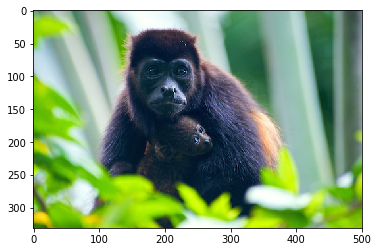

In [7]:
img = plt.imread(f'{PATH}validation/n0/{files[0]}')
plt.imshow(img);

In [8]:
img.shape

(331, 500, 3)

In [9]:
img[:4, :4]

array([[[108, 164, 119],
        [109, 162, 120],
        [108, 161, 119],
        [111, 159, 121]],

       [[113, 169, 120],
        [111, 167, 118],
        [112, 166, 117],
        [112, 164, 118]],

       [[116, 173, 118],
        [115, 172, 117],
        [115, 170, 113],
        [113, 168, 113]],

       [[117, 175, 114],
        [116, 175, 111],
        [114, 173, 109],
        [114, 170, 107]]], dtype=uint8)

# First Model: Quick Start

We use a pretrained model as in tutorial 1 of fastai course. 
Base model resnet34

In [10]:
sz = 224
arch = resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), bs=16,
                                      trn_name='training', val_name='validation')


In [12]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 63961720.96it/s]


In [25]:
learn.fit(0.1, 2)

epoch      trn_loss   val_loss   accuracy                   
    0      0.668083   0.326529   0.970588  
    1      0.617893   0.843076   0.948529                   



[array([0.84308]), 0.9485294117647058]

# Analysis: first model

In [12]:
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [13]:
data.classes

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

In [14]:
log_preds = learn.predict()
log_preds.shape

(272, 10)

In [15]:
log_preds[:10]

array([[ -0.00001, -15.44159, -13.181  , -19.83832, -19.82164, -15.24087, -19.87098, -15.59925, -11.55774,
        -13.00895],
       [  0.     , -21.16995, -18.06787, -19.14545, -24.52421, -19.19856, -26.63409, -21.57772, -20.27821,
        -14.66   ],
       [  0.     , -25.4697 , -19.29775, -24.43732, -22.14075, -17.87109, -25.78305, -19.27762, -15.94368,
        -16.00099],
       [  0.     , -28.52596, -22.03988, -28.56886, -28.53196, -23.77518, -35.17025, -28.67383, -21.84574,
        -21.39752],
       [ -0.     , -18.08194, -16.34554, -22.72192, -18.43658, -13.28015, -22.62523, -19.17204, -15.58787,
        -14.71933],
       [  0.     , -20.94929, -19.19417, -19.21973, -22.52214, -16.97751, -24.68426, -17.40029, -18.76413,
        -14.98803],
       [ -0.00058, -17.36471, -16.02357, -16.36074, -14.71237, -15.2451 , -21.05003, -14.80876, -15.69768,
         -7.45218],
       [  0.     , -20.47536, -20.5179 , -23.23299, -16.05338, -21.66084, -26.98729, -17.77235, -18.37331,
    

In [16]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds)

In [17]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [18]:
def plots(ims, figsize=(12, 6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [19]:
def plot_val_with_title(indexes, title):
    images = np.stack([data.val_ds[index][0] for index in indexes])
    title_probs = [probs[index] for index in indexes]
    print(title)
    return plots(data.val_ds.denorm(images), rows=1, titles=title_probs)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Correctly classified


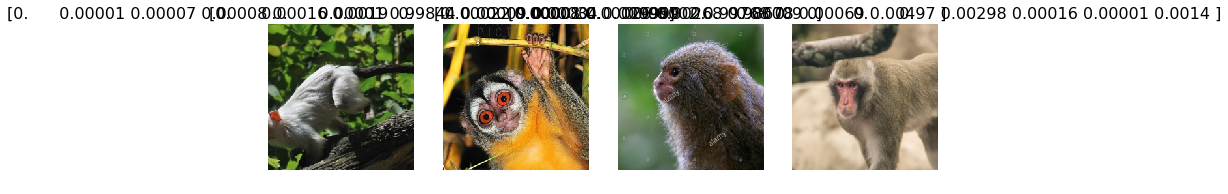

In [20]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [21]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

ValueError: Cannot take a larger sample than population when 'replace=False'

In [35]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

# Change The Learning Rate:

In [26]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf = learn.lr_find(start_lr=1e-3, end_lr=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.728343   16.265267  0.713235  



In [122]:
?learn.lr_find

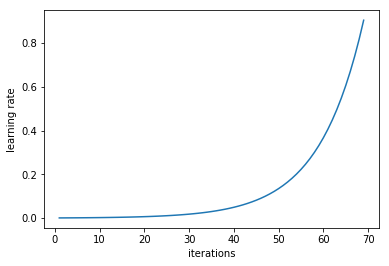

In [27]:
learn.sched.plot_lr()

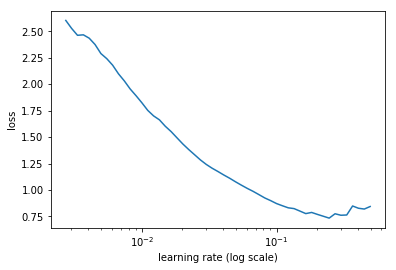

In [28]:
learn.sched.plot()

# Improving Model:

## Data Augmentation:

In [29]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [30]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1,
                                         trn_name='training', val_name='validation')
    x, _ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [31]:
ims = np.stack([get_augs() for i in range(6)])

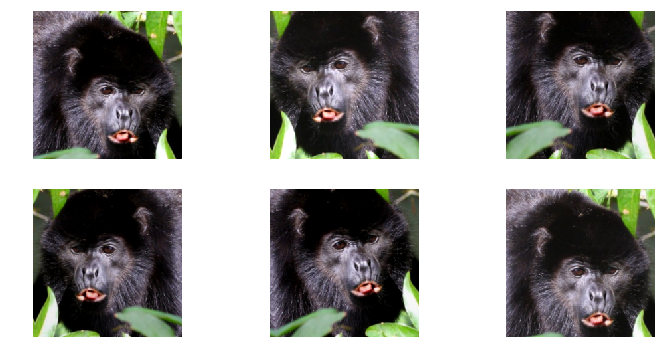

In [32]:
plots(ims, rows=2)

In [33]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=16,
                                     trn_name='training', val_name='validation')
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [34]:
learn.fit(5e-2, 1)

epoch      trn_loss   val_loss   accuracy                   
    0      0.431823   0.119714   0.966912  



[array([0.11971]), 0.9669117647058824]

In [35]:
learn.precompute=False

In [36]:
learn.fit(5e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.228976   0.031233   0.988971  
    1      0.21781    0.056      0.985294                  
    2      0.148862   0.065513   0.992647                  



[array([0.06551]), 0.9926470588235294]

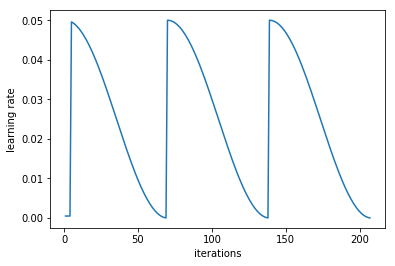

In [37]:
learn.sched.plot_lr()

In [38]:
learn.save('224_lastlayer')

In [14]:
learn.load('224_lastlayer')

RuntimeError: While copying the parameter named 0.weight, whose dimensions in the model are torch.Size([1024]) and whose dimensions in the checkpoint are torch.Size([64, 3, 7, 7]).

## Fine_tuning and differential learning rate annealing

In [137]:
learn.unfreeze()

In [40]:
lr = np.array([1e-5, 1e-4, 5e-2])

In [41]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      0.166109   0.028419   0.996324  
    1      0.147538   0.046689   0.985294                  
    2      0.087119   0.041763   0.988971                   
    3      0.13264    0.032158   0.985294                   
    4      0.126645   0.008466   1.0                       
    5      0.119802   0.012639   0.992647                  
    6      0.099052   0.009018   0.992647                   



[array([0.00902]), 0.9926470588235294]

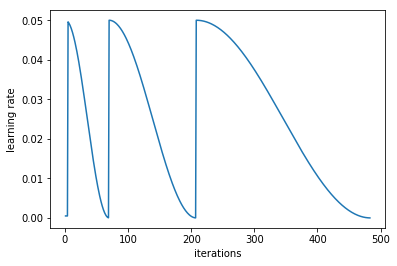

In [42]:
learn.sched.plot_lr()

In [43]:
learn.save('224_all')

In [13]:
learn.load('224_all')

RuntimeError: While copying the parameter named 0.weight, whose dimensions in the model are torch.Size([1024]) and whose dimensions in the checkpoint are torch.Size([64, 3, 7, 7]).

In [45]:
log_preds,y = learn.TTA()

In [46]:
probs = np.mean(np.exp(log_preds), 0)

In [47]:
accuracy_np(probs, y)

0.9963235294117647